In [1]:
import os
import DataProcess
import bidirectional_lstm_new as bls

2023-10-27 01:02:12.232240: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-27 01:02:12.232269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
cwd = '/home/jovyan/Snow-Extrapolation/contributors/lstm'
datapath = '/home/jovyan/Snow-Extrapolation'

In [3]:
#Define hold out year
HOY = 2019
#Run data processing script to partition key regional dataframes
#note, need to load RegionTrain_SCA.h5,
RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, RegionTest_notScaled = DataProcess.DataProcess(HOY, datapath, cwd)

Processing training dataframes for each region
N_Sierras
S_Sierras_Low
S_Sierras_High


In [4]:
#Get regions
Regions = list(RegionTrain.keys())
Predictions = {} 
for Region in Regions:
    epochs= 3
    model = bls.Model_train(cwd, epochs, RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, Region)
    
    Predictions[Region] = bls.Model_predict(cwd,  RegionTest, RegionObs_Test, RegionTest_notScaled, Region, model)
    
    
    

Training model for:  N_Sierras
All previous files deleted successfully.
(750, 1, 105)


2023-10-27 01:02:17.157541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-27 01:02:17.157571: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-27 01:02:17.157587: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-savalann): /proc/driver/nvidia/version does not exist
2023-10-27 01:02:17.157794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


8/8 [==============================] - 0s 2ms/step
Training model for:  S_Sierras_Low
All previous files deleted successfully.
(838, 1, 6)
9/9 [==============================] - 0s 2ms/step
Training model for:  S_Sierras_High
All previous files deleted successfully.
(1632, 1, 40)
18/18 [==============================] - 0s 2ms/step


Preliminary Model Analysis for:  N_Sierras
 R2 is  0.8883566705501574
 RMSE is  12.171535388168127
 R2 fSCA is  0.8742078453201052
 RMSE fSCA is  12.919798917224224


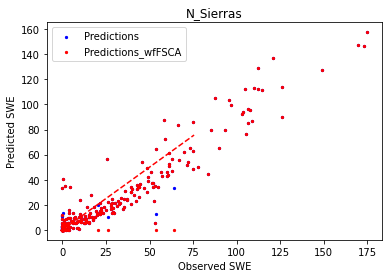

Preliminary Model Analysis for:  S_Sierras_Low
 R2 is  0.9727790811052115
 RMSE is  4.163082409152016
 R2 fSCA is  0.8660364362071874
 RMSE fSCA is  9.23542664939551


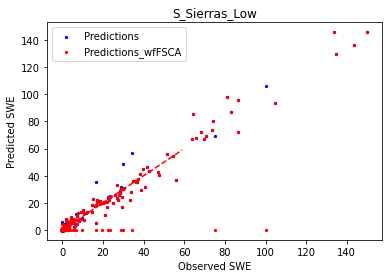

Preliminary Model Analysis for:  S_Sierras_High
 R2 is  0.9830778287527668
 RMSE is  6.102324957370068
 R2 fSCA is  0.9709376278584758
 RMSE fSCA is  7.997105357927983


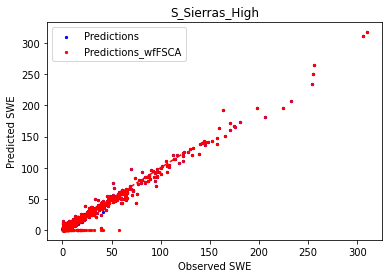

,Region,R2,RMSE,R2_fSCA,RMSE_fSCA
0,N_Sierras,0.89,12.17,0.87,12.92
1,S_Sierras_Low,0.97,4.16,0.87,9.24
2,S_Sierras_High,0.98,6.1,0.97,8.0


In [5]:
Performance = bls.Prelim_Eval(cwd, Predictions)
Performance